In [25]:
import pandas as pd
import numpy as np

In [26]:
# Given Code Snippets
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [27]:
df.unstack(level=0).stack(level=0).swaplevel().swaplevel(axis=1).sort_index()

C:\Users\mahes\AppData\Local\Temp\ipykernel_18320\1833749936.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df.unstack(level=0).stack(level=0).swaplevel().swaplevel(axis=1).sort_index()


cse         ece      cse      ece
            avg_package avg_package students students
delhi  2019           1           9        2       10
       2020           3          11        4       12
       2021           5          13        6       14
       2022           7          15        8       16
mumbai 2019           0           0        0        0
       2020           0           0        0        0
       2021           0           0        0        0
       2022           0           0        0        0

In [28]:
confirm = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTmqT3kxd0i0RUFiEnwA1Hboiunv28MeNTatZsIEqlPPB7mHrl0ttJL7utZ23_1s5FW8ZjODmB8jHIi/pub?gid=2142019845&single=true&output=csv')

deaths = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQn4nLCKIVZMw4e89YeRqgKaSAAwRFaZ6ILMW_FUejZ2tkv3Np1f9gD4QOl3ASHeLzWjOjfmLDKcCOF/pub?gid=212966958&single=true&output=csv")

In [29]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [30]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [31]:
deaths=deaths.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Num_deaths')
confirm=confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Date',value_name='Num_cases')

In [32]:
confirm

,Province/State,Country/Region,Lat,Long,Date,Num_cases
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661


In [34]:
final_df=confirm.merge(deaths,on=['Province/State','Country/Region','Lat','Long','Date'])
final_df

,Province/State,Country/Region,Lat,Long,Date,Num_cases,Num_deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661,4024


In [38]:
#final_df.set_index(['Country/Region','Province/State'],inplace=True)
final_df = final_df[['Date','Num_cases','Num_deaths']]
final_df

,,Date,Num_cases,Num_deaths
Country/Region,Province/State,,,
Afghanistan,NaN,1/22/20,0,0
Albania,NaN,1/22/20,0,0
Algeria,NaN,1/22/20,0,0
Andorra,NaN,1/22/20,0,0
Angola,NaN,1/22/20,0,0
...,...,...,...,...
West Bank and Gaza,NaN,1/2/23,703228,5708
Winter Olympics 2022,NaN,1/2/23,535,0
Yemen,NaN,1/2/23,11945,2159


In [40]:
# code here
temp_df = final_df.groupby('Country/Region').sum()
temp_df['death_percentage'] = (temp_df['Num_deaths']/temp_df['Num_cases'])*100
temp_df.sort_values('death_percentage',ascending=False)

,Date,Num_cases,Num_deaths,death_percentage
Country/Region,,,,
"Korea, North",1/22/201/23/201/24/201/25/201/26/201/27/201/28...,234,1404,600.000000
MS Zaandam,1/22/201/23/201/24/201/25/201/26/201/27/201/28...,9071,2014,22.202624
Yemen,1/22/201/23/201/24/201/25/201/26/201/27/201/28...,7091065,1372952,19.361718
Sudan,1/22/201/23/201/24/201/25/201/26/201/27/201/28...,38729339,2850576,7.360250
Peru,1/22/201/23/201/24/201/25/201/26/201/27/201/28...,2203724423,156296296,7.092370
...,...,...,...,...
Holy See,1/22/201/23/201/24/201/25/201/26/201/27/201/28...,24893,0,0.000000
Summer Olympics 2020,1/22/201/23/201/24/201/25/201/26/201/27/201/28...,441598,0,0.000000
Winter Olympics 2022,1/22/201/23/201/24/201/25/201/26/201/27/201/28...,179152,0,0.000000


In [41]:
# code here
india_df = final_df.loc['India'].copy()
india_df['New_cases'] = india_df['Num_cases'] - india_df['Num_cases'].shift(1)
india_df

,Date,Num_cases,Num_deaths,New_cases
Province/State,,,,
NaN,1/22/20,0,0,NaN
NaN,1/23/20,0,0,0.0
NaN,1/24/20,0,0,0.0
NaN,1/25/20,0,0,0.0
NaN,1/26/20,0,0,0.0
...,...,...,...,...
NaN,12/29/22,44679382,530699,243.0
NaN,12/30/22,44679608,530702,226.0
NaN,12/31/22,44679873,530705,265.0


In [42]:
# code here
df = pd.read_csv('https://tinyurl.com/2fe6vz4u')
df.head()

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,4,5,India,Patna,2016,144,>75%,266,NaN,2018


In [43]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [44]:
df.set_index(['Country','City/Town'],inplace=True)

In [45]:
df.head()

Position  Year  PM2.5 Temporal coverage  PM10  \
Country City/Town                                                  
India   Kanpur            1  2016    173              >75%   319   
        Faridabad         2  2016    172              >75%   316   
        Gaya              3  2016    149        50% -< 75%   275   
        Varanasi          4  2016    146              >75%   260   
        Patna             5  2016    144              >75%   266   

                  Temporal coverage.1  Database version (year)  
Country City/Town                                               
India   Kanpur                    NaN                     2018  
        Faridabad                 NaN                     2018  
        Gaya                      NaN                     2018  
        Varanasi                  NaN                     2018  
        Patna                     NaN                     2018

<Axes: ylabel='PM10'>

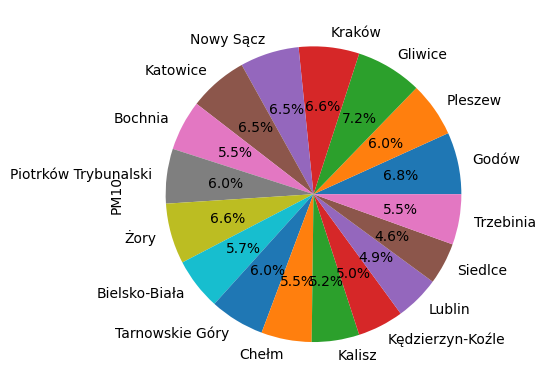

In [46]:
df.loc['Poland']['PM10'].plot(kind='pie',autopct="%0.1f%%")

<Axes: xlabel='Country,City/Town'>

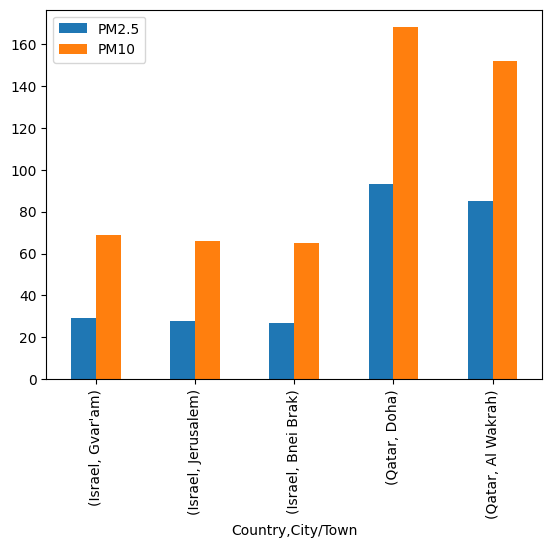

In [47]:
df.loc[['Israel','Qatar']][['PM2.5','PM10']].plot(kind='bar')

In [48]:
df.stack()

Country  City/Town                         
India    Kanpur     Position                      1
                    Year                       2016
                    PM2.5                       173
                    Temporal coverage          >75%
                    PM10                        319
                                               ... 
Turkey   Sivas      PM2.5                        27
                    Temporal coverage          >75%
                    PM10                         56
                    Temporal coverage.1        >75%
                    Database version (year)    2018
Length: 2638, dtype: object